# Abstract
The project aims to recognize handwritten characters from a dataset containing images of alphabets (A-Z). The dataset consists of 26 folders, each representing a letter, with images stored in 28x28 pixels. The challenge involves addressing the high dimensionality of image data through feature reduction methods, including PCA and t-SNE. Non-deep learning models such as SVM, Random Forest, k-NN, and Logistic Regression are employed for digit prediction. The study explores various techniques to enhance model performance, provides visualizations for interpretation, and documents the experimentation process.

# Introduction
Handwriting recognition is a critical task in the realm of image classification, often requiring extensive datasets for effective model training. This project focuses on recognizing handwritten characters from a unique dataset that contains images of alphabets (A-Z). The challenge lies in the high dimensionality of image data, prompting the exploration of feature reduction methods to capture essential information efficiently. By utilizing non-deep learning models and experimenting with diverse techniques, this study aims to achieve accurate digit prediction while gaining insights into the inherent structure of handwritten data.

# Dataset Explanation
The dataset comprises 26 folders, each corresponding to an alphabet from A to Z. Within each folder, handwritten images are stored in grayscale with dimensions of 28x28 pixels. The images are centered within a 20x20 pixel box, providing consistency in the dataset. It's important to note that the dataset might contain some noisy images. The Kernel CSV_To_Images contains a script to convert the CSV file to actual images in PNG format, organized in structured folders.

### Load and Explore Data

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

from skimage import exposure

from numpy import random

In [2]:
df = pd.read_csv('/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv')

In [3]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Preprocess and visualize Data

In [4]:
df['0'].nunique

<bound method IndexOpsMixin.nunique of 0          0
1          0
2          0
3          0
4          0
          ..
372445    25
372446    25
372447    25
372448    25
372449    25
Name: 0, Length: 372450, dtype: int64>

In [5]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

X_normalized = X / 255.0

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

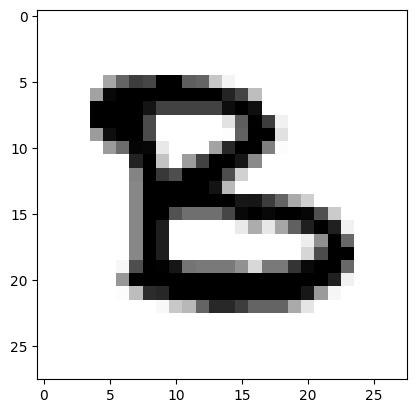

In [6]:
plt.imshow(X_train[0].reshape(28, 28), cmap=cm.binary, interpolation="nearest")
plt.show()

In [7]:
y_train[0]

1

In [8]:
# Apply histogram equalization for contrast enhancement
def apply_histogram_equalization(image):
    return exposure.equalize_hist(image)

In [9]:
from scipy.ndimage import rotate

In [10]:
# Apply data augmentation techniques (e.g., rotation, flipping)
def apply_data_augmentation(image):
    # Implement your data augmentation techniques here
    # Example: return rotated or flipped images
    rotated_image = rotate(image.reshape(28, 28), angle=np.random.uniform(-20, 20), reshape=False)
    return rotated_image.flatten()

In [11]:
# Apply preprocessing to each image
X_train_processed = np.array([apply_histogram_equalization(img) for img in X_train])
X_test_processed = np.array([apply_histogram_equalization(img) for img in X_test])

In [28]:
# Apply data augmentation to training set (optional)
X_train_augmented = np.array([apply_data_augmentation(img) for img in X_train_processed])
y_train_augmented = np.tile(y_train, 1)  # Assuming 4 times augmentation

In [29]:
# Concatenate original and augmented data
X_train_final = np.concatenate([X_train_processed, X_train_augmented])
y_train_final = np.concatenate([y_train, y_train_augmented])

In [30]:
X_train_final.shape

(595920, 784)

In [31]:
y_train_final.shape

(595920,)

In [14]:
# Check the length of X_train and y_train
assert len(X_train) == len(y_train), "Length mismatch between X_train and y_train"

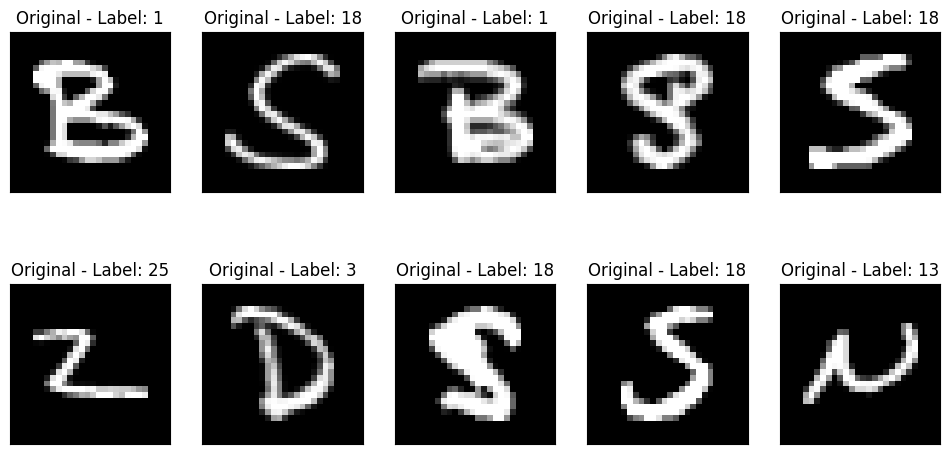

In [15]:
# Visualize original and preprocessed images
fig, axes = plt.subplots(2, 5, figsize=(12, 6), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Original - Label: {y_train[i]}')

plt.show()

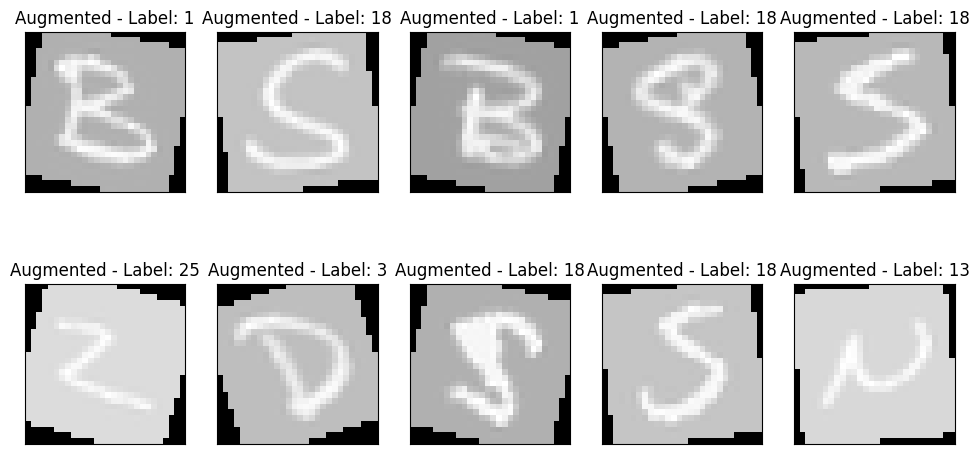

In [16]:
# Visualize augmented images
fig, axes = plt.subplots(2, 5, figsize=(12, 6), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train_augmented[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Augmented - Label: {y_train_final[i]}')

plt.show()

In [17]:
import seaborn as sns

### PCA for Dimensionality Reduction

In [41]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### t-SNE for Dimensionality Reduction

In [19]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_final)

### Train and Evaluate Models

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [23]:
# Train and evaluate non-deep learning models
lda_classifier = LinearDiscriminantAnalysis()
rf_classifier = RandomForestClassifier()
knn_classifier = KNeighborsClassifier()
lr_classifier = LogisticRegression()

In [42]:
# Train models
lda_classifier.fit(X_train_pca, y_train)
rf_classifier.fit(X_train_pca, y_train)
knn_classifier.fit(X_train_pca, y_train)
lr_classifier.fit(X_train_pca, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model Evaluation

In [34]:
from sklearn.metrics import accuracy_score, classification_report

In [35]:
# Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

In [43]:
# random forest
accuracy_rf, report_rf = evaluate_model(rf_classifier, X_test_pca, y_test)
print(f"rf Accuracy: {accuracy_rf}")
print(f"rf Classification Report:\n{report_rf}")

rf Accuracy: 0.9828970331588133
rf Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2806
           1       0.99      0.96      0.97      1673
           2       0.99      0.99      0.99      4742
           3       0.98      0.96      0.97      2044
           4       0.99      0.97      0.98      2214
           5       0.98      0.83      0.90       231
           6       0.98      0.94      0.96      1183
           7       0.97      0.96      0.97      1466
           8       1.00      0.86      0.93       237
           9       0.98      0.96      0.97      1668
          10       0.98      0.95      0.97      1132
          11       0.99      0.99      0.99      2319
          12       0.98      0.96      0.97      2487
          13       0.97      0.99      0.98      3756
          14       0.98      1.00      0.99     11629
          15       0.98      0.99      0.98      3868
          16       0.98

In [44]:
# LDA
accuracy_lda, report_lda = evaluate_model(lda_classifier, X_test_pca, y_test)
print(f"lda Accuracy: {accuracy_lda}")
print(f"lda Classification Report:\n{report_lda}")

lda Accuracy: 0.7850449724795274
lda Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.77      0.75      2806
           1       0.72      0.71      0.72      1673
           2       0.87      0.85      0.86      4742
           3       0.73      0.72      0.73      2044
           4       0.79      0.72      0.76      2214
           5       0.46      0.79      0.58       231
           6       0.66      0.71      0.68      1183
           7       0.57      0.58      0.58      1466
           8       0.35      0.84      0.50       237
           9       0.41      0.53      0.46      1668
          10       0.59      0.62      0.61      1132
          11       0.80      0.84      0.82      2319
          12       0.78      0.86      0.82      2487
          13       0.70      0.71      0.71      3756
          14       0.93      0.91      0.92     11629
          15       0.77      0.82      0.79      3868
          16       0.

In [45]:
# KNN
accuracy_knn, report_knn = evaluate_model(knn_classifier, X_test_pca, y_test)
print(f"knn Accuracy: {accuracy_knn}")
print(f"knn Classification Report:\n{report_knn}")

knn Accuracy: 0.9696066586118942
knn Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2806
           1       0.97      0.93      0.95      1673
           2       0.96      0.98      0.97      4742
           3       0.94      0.90      0.92      2044
           4       0.98      0.94      0.96      2214
           5       0.97      0.91      0.94       231
           6       0.97      0.90      0.93      1183
           7       0.93      0.93      0.93      1466
           8       0.97      0.92      0.95       237
           9       0.96      0.94      0.95      1668
          10       0.95      0.94      0.95      1132
          11       0.96      0.98      0.97      2319
          12       0.99      0.97      0.98      2487
          13       0.96      0.98      0.97      3756
          14       0.97      0.99      0.98     11629
          15       0.95      0.98      0.96      3868
          16       0.

In [46]:
# logistic regression
accuracy_lr, report_lr = evaluate_model(lr_classifier, X_test_pca, y_test)
print(f"lr Accuracy: {accuracy_lr}")
print(f"lr Classification Report:\n{report_lr}")

lr Accuracy: 0.8613639414686535
lr Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      2806
           1       0.83      0.75      0.78      1673
           2       0.89      0.89      0.89      4742
           3       0.80      0.76      0.78      2044
           4       0.82      0.79      0.80      2214
           5       0.90      0.79      0.84       231
           6       0.84      0.72      0.78      1183
           7       0.73      0.68      0.70      1466
           8       0.83      0.82      0.83       237
           9       0.71      0.72      0.72      1668
          10       0.77      0.75      0.76      1132
          11       0.90      0.95      0.93      2319
          12       0.87      0.89      0.88      2487
          13       0.77      0.80      0.79      3756
          14       0.92      0.95      0.94     11629
          15       0.88      0.91      0.90      3868
          16       0.83

### Hyperparameter Tuning

In [47]:
from sklearn.model_selection import GridSearchCV

In [50]:
# Perform hyperparameter tuning
param_grid = {'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1], 'kernel': ['rbf']}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid_search.fit(X_train_pca, y_train)
# Also we can apply it to other methods

In [ ]:
# Get best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")